# <center>Diabetes Prediction</center>

### About Dataset

The <b>Diabetes prediction dataset</b> is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). 
The data includes features such as:
* Age: Age is an important factor as diabetes is more commonly diagnosed in older adults.
<br>
* Gender: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to Male and Female.
<br>
* Body mass index (BMI): BMI is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of obesity-related health problems, including diabetes, heart disease, and certain types of cancer.
<br>
* Hypertension: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. contains 0 which indicates no hypertension and 1 which indicates hypertension.
<br>
* Heart disease: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. contains which indicates no heart diseases 0 and 1 which indicate heart diseases.
<br>
* Smoking history: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with the disease. containd, Former, current, and No info.
<br>
* HbA1c level: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher HbA1c levels are associated with a higher risk of developing diabetes complications, such as nerve damage, kidney damage, and vision problems.
<br>
* Blood glucose level: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels can damage organs and tissues over time, increasing the risk of complications such as heart disease, kidney disease, and nerve damage.
<br>
* Diabetes: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absent of diabetes.
<br>

This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

Dataset Link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

#### Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Loading the dataset

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
# viewing the first ten records
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Unique count
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [6]:
df.HbA1c_level.unique()

array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
       7. , 8.8, 8.2, 7.5, 6.8])

In [7]:
df.blood_glucose_level.unique()

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240], dtype=int64)

### Data Analysis

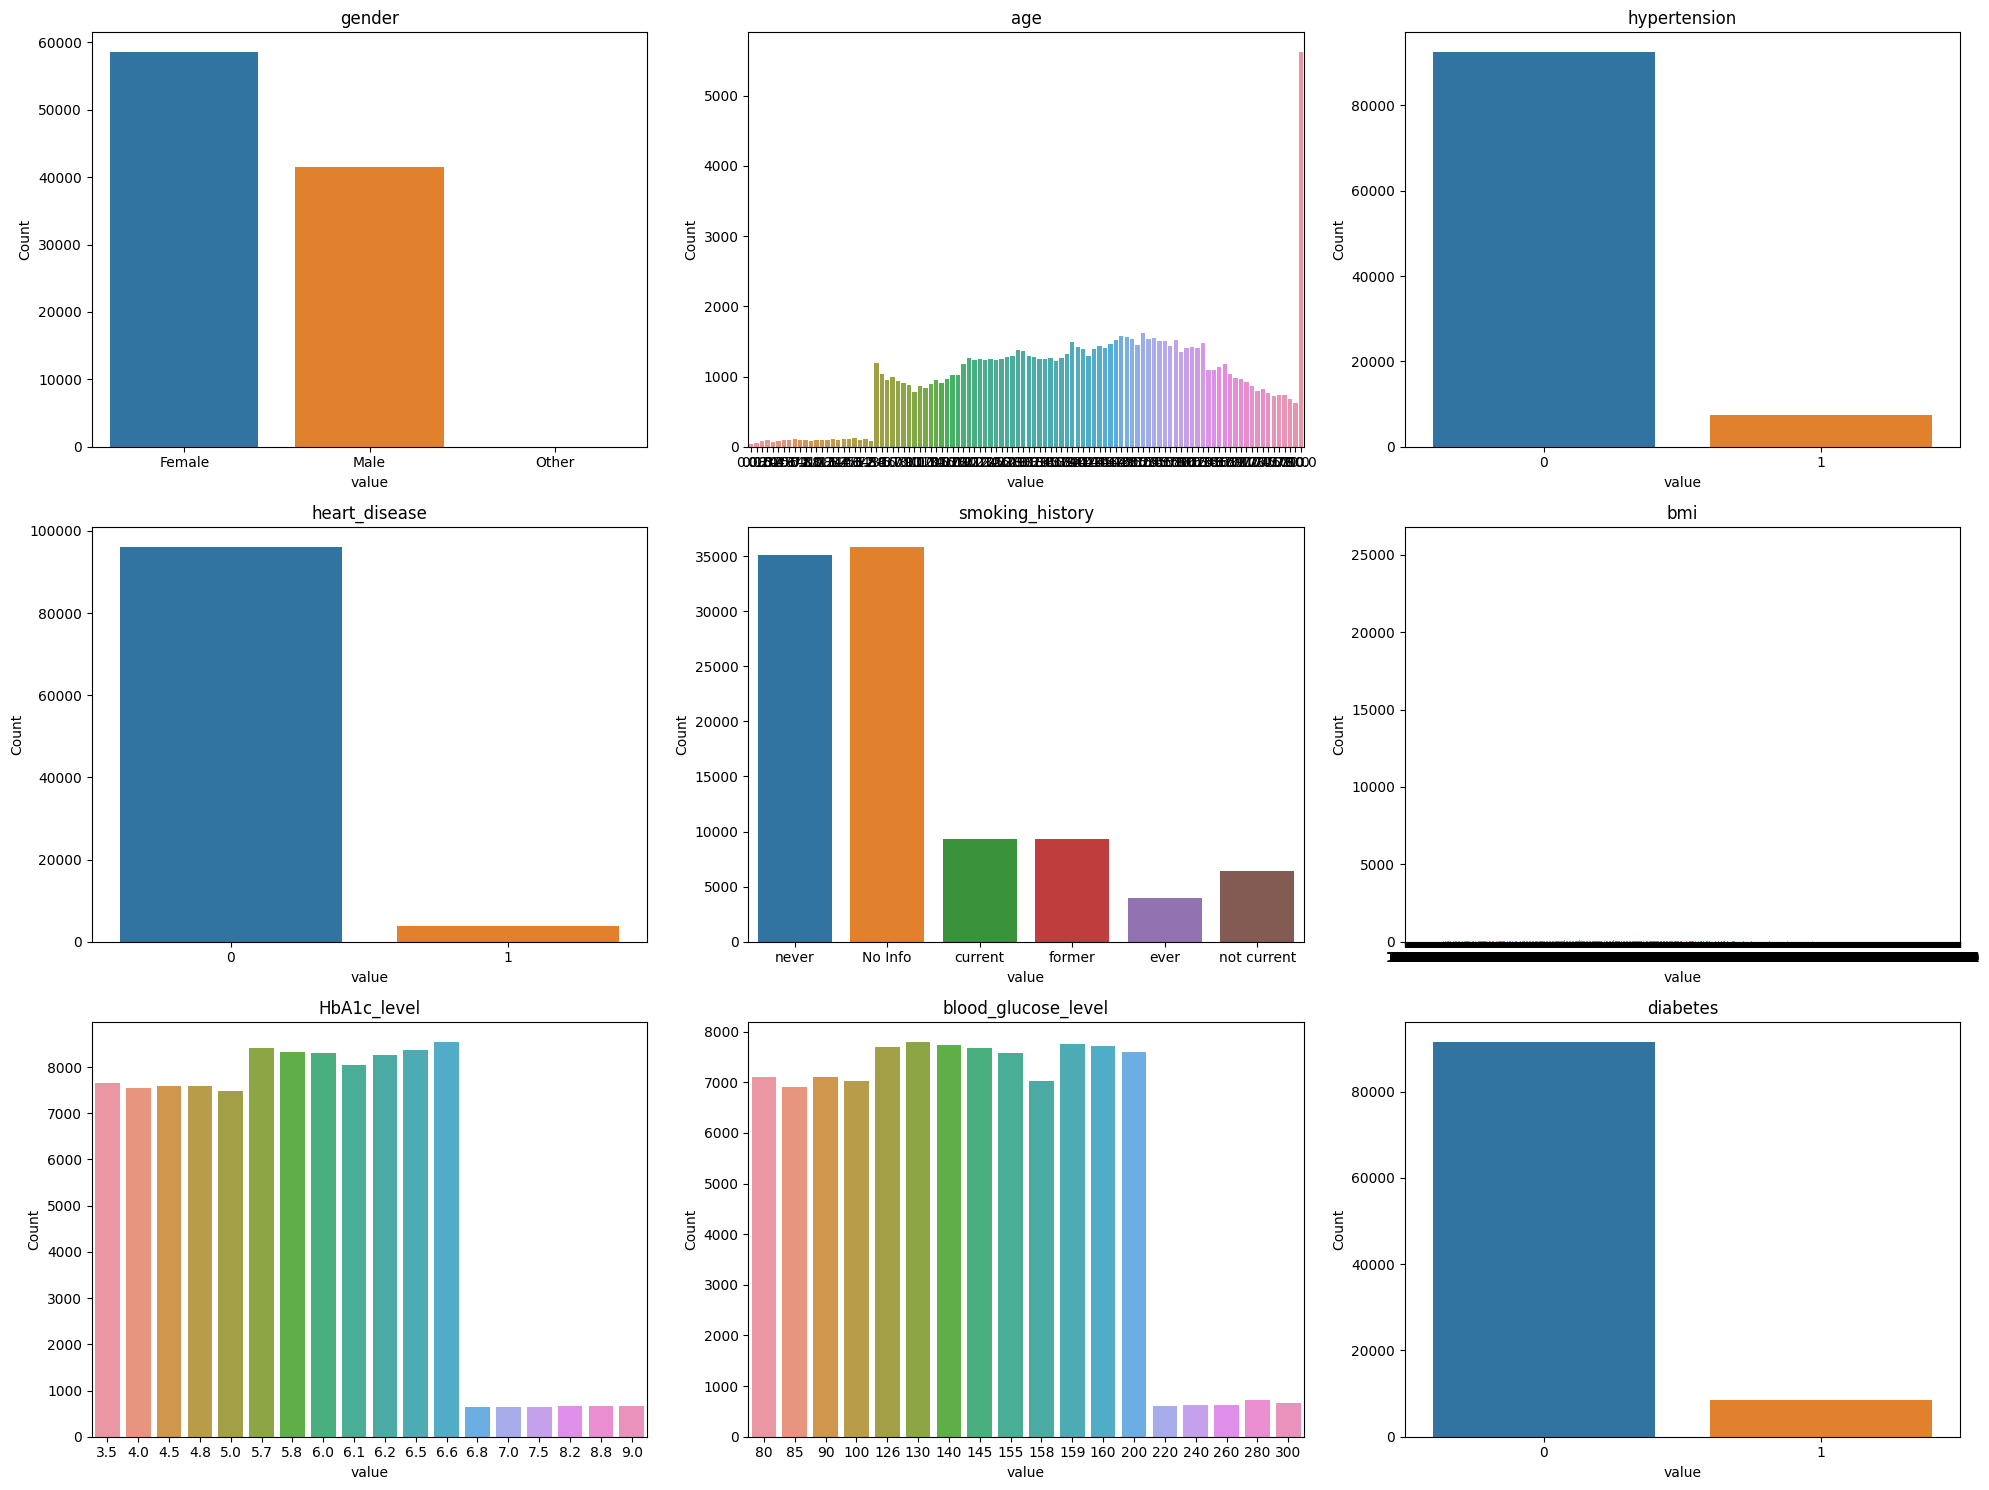

In [10]:
# visualizing
# calculate the number of row and columns for the subplots
import math
num_features = len(df.columns)
num_rows = 3 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(df.columns):
    axe = axes[i]
    sns.countplot(data=df, x=columns, ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Count')
    axe.
    
plt.tight_layout()
plt.show()

In [11]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [12]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


<Axes: xlabel='gender', ylabel='count'>

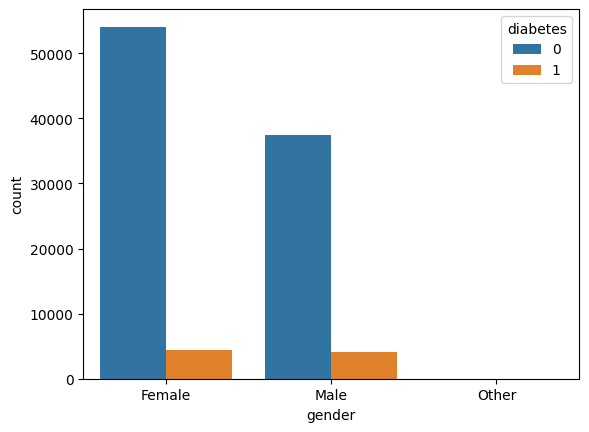

In [14]:
#gender vs Diabeties
sns.countplot(data=df, x='gender', hue='diabetes')

In [16]:
df.groupby('gender')['diabetes'].count()

gender
Female    58552
Male      41430
Other        18
Name: diabetes, dtype: int64

<Axes: xlabel='diabetes', ylabel='age'>

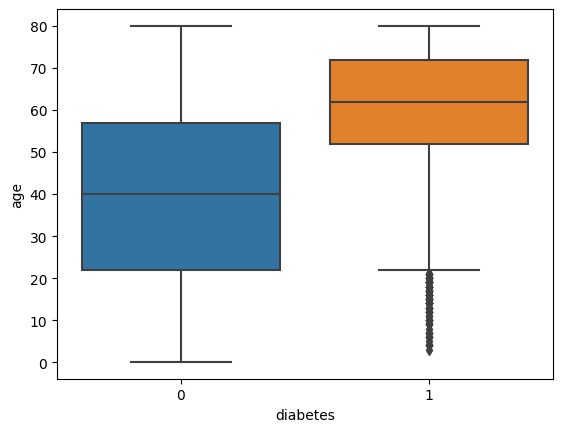

In [21]:
#age vs diabetes
sns.boxplot(x='diabetes', y='age', data=df, h)

<Axes: xlabel='heart_disease', ylabel='count'>

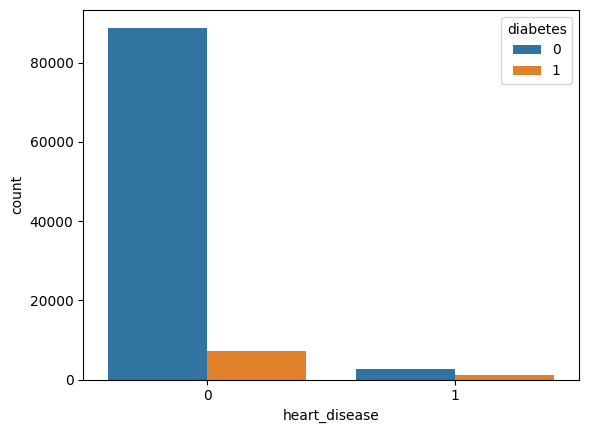

In [26]:
#heart_disease vs Diabeties
sns.countplot(data=df, x='heart_disease', hue='diabetes')

<Axes: xlabel='heart_disease', ylabel='age'>

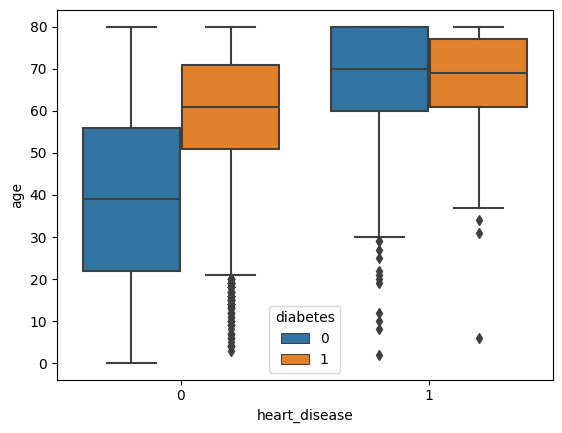

In [28]:
#age, heart_disease vs diabetes
sns.boxplot(x='heart_disease', y='age', data=df, hue='diabetes')

<Axes: xlabel='smoking_history', ylabel='age'>

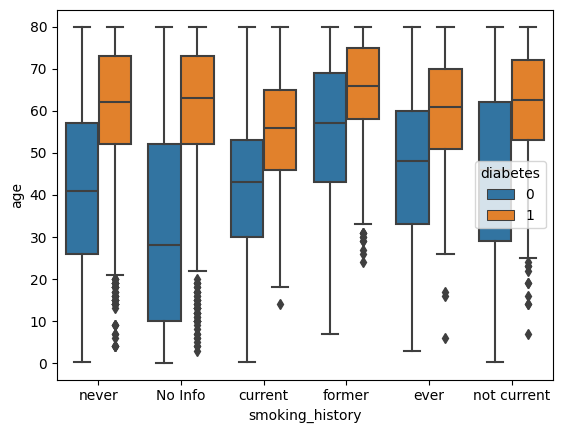

In [29]:
#age, smoke_history vs diabetes
sns.boxplot(x='smoking_history', y='age', data=df, hue='diabetes')

<Axes: xlabel='smoking_history', ylabel='count'>

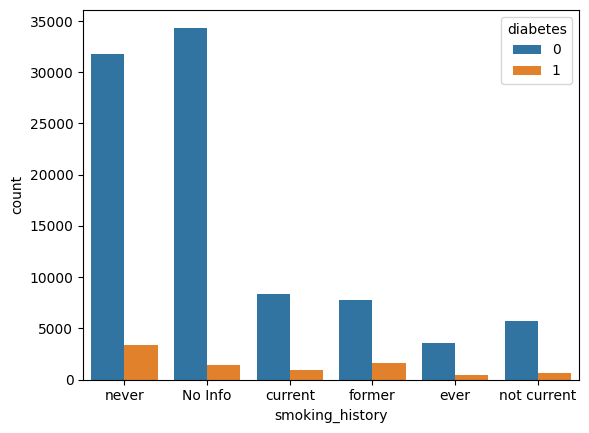

In [31]:
#smoking_history vs Diabeties
sns.countplot(data=df, x='smoking_history', hue='diabetes')

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

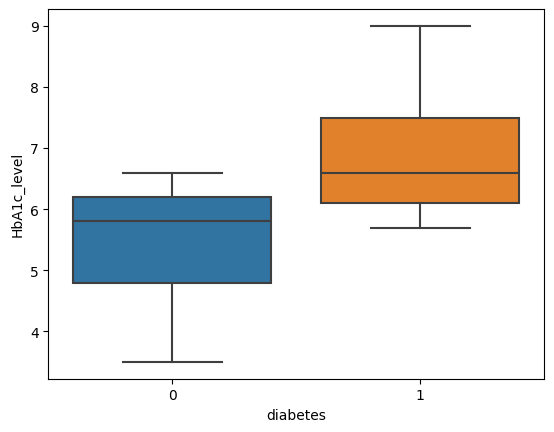

In [34]:
#HbA1c_level vs diabetes
sns.boxplot(y='HbA1c_level', data=df, x='diabetes')

C:\Users\hp\AppData\Local\Temp\ipykernel_2760\2744345864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=True)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

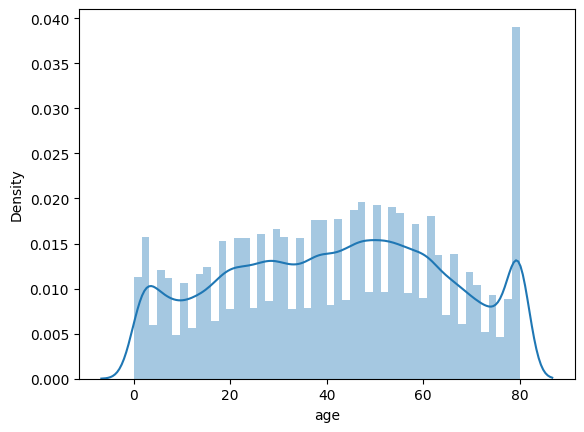

In [39]:
sns.distplot(df['age'], kde=True)

In [40]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: ylabel='age'>

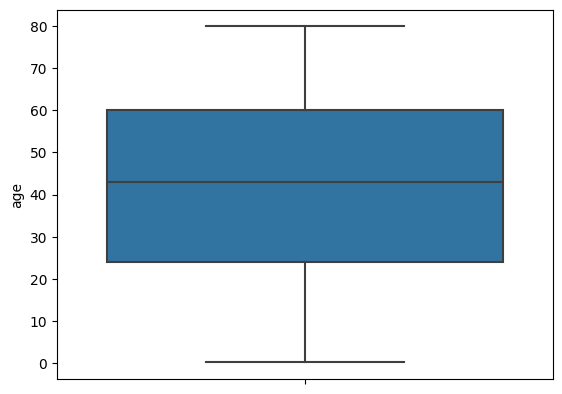

In [42]:
sns.boxplot(y='age', data=df)

C:\Users\hp\AppData\Local\Temp\ipykernel_2760\539790447.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], kde=True)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Density'>

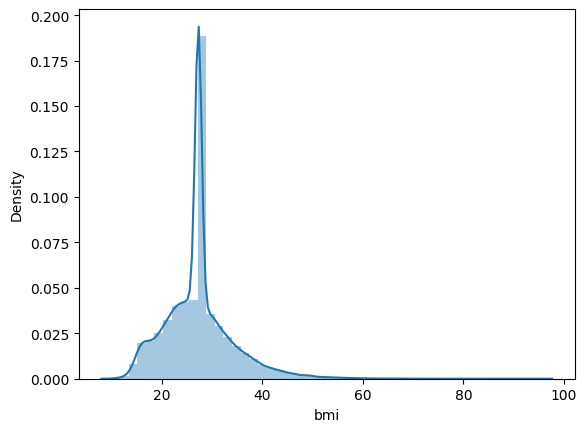

In [41]:
sns.distplot(df['age'], kde=True)

<Axes: ylabel='bmi'>

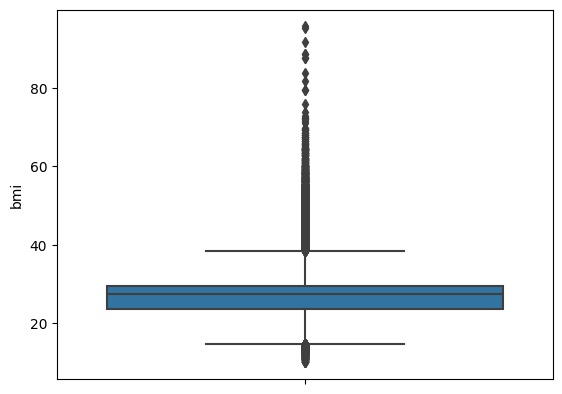

In [43]:
sns.boxplot(y='bmi', data=df)

## Modelling

#### preprocessing 

In [54]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])

In [55]:
df.gender.unique()

array([0, 1, 2], dtype=int64)

In [56]:
# treating the bmi column

df['bmi_2'] = np.log(df['bmi'])

<Axes: ylabel='bmi_2'>

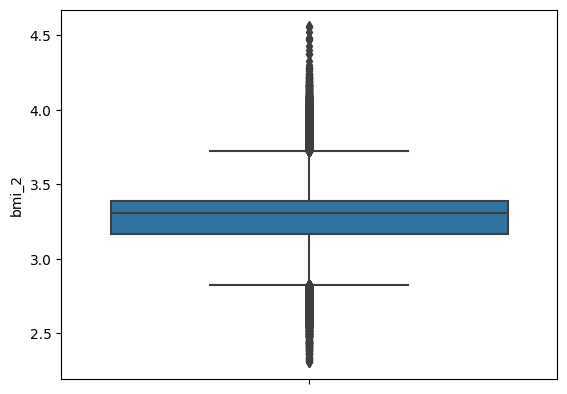

In [57]:
sns.boxplot(y='bmi_2', data=df)

C:\Users\hp\AppData\Local\Temp\ipykernel_2760\2856130148.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi_2'], kde=True)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi_2', ylabel='Density'>

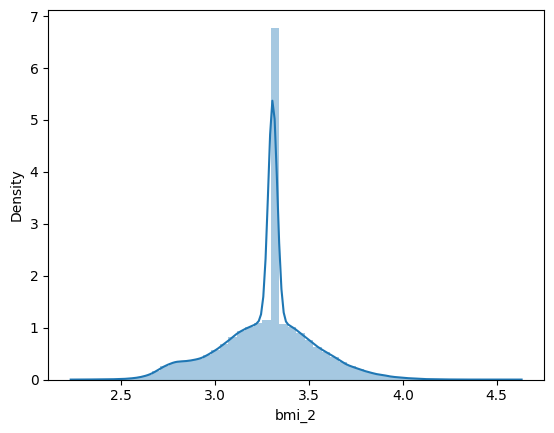

In [58]:
sns.distplot(df['bmi_2'], kde=True)

In [59]:
df2 = df.drop('bmi', axis=1)

In [60]:
df2

,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes,bmi_2
0,0,80.0,0,1,4,6.6,140,0,3.226447
1,0,54.0,0,0,0,6.6,80,0,3.307619
2,1,28.0,0,0,4,5.7,158,0,3.307619
3,0,36.0,0,0,1,5.0,155,0,3.154870
4,1,76.0,1,1,1,4.8,155,0,3.002708
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,6.2,90,0,3.307619
99996,0,2.0,0,0,0,6.5,100,0,2.854745
99997,1,66.0,0,0,3,5.7,155,0,3.326115
99998,0,24.0,0,0,4,4.0,100,0,3.567277


In [61]:
# separating the X and Y variables

X = df2.drop('diabetes', axis=1)
y = df2['diabetes']

In [62]:
# splitting
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [68]:
#importing the selected needed algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#importing the boosting agorithms
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier


#importing the evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [69]:
X_test

,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,bmi_2
69456,0,36.0,0,0,3,6.0,160,3.119718
86614,0,31.0,0,0,4,5.8,126,3.307619
61660,1,52.0,0,0,5,4.0,100,3.144152
8558,0,29.0,0,0,4,5.0,160,3.420019
4619,1,61.0,0,0,4,5.8,90,3.291383
...,...,...,...,...,...,...,...,...
4738,0,22.0,0,0,0,4.0,80,3.010621
89031,0,38.0,0,0,4,3.5,130,3.161247
59812,0,38.0,0,0,4,6.2,159,3.279783
17244,0,78.0,0,0,0,5.8,85,3.307619


Random Classifier Accuracy: 0.9706
ROC AUC Score: 1.0
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.95      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

[[18233    67]
 [  521  1179]]


<Axes: >

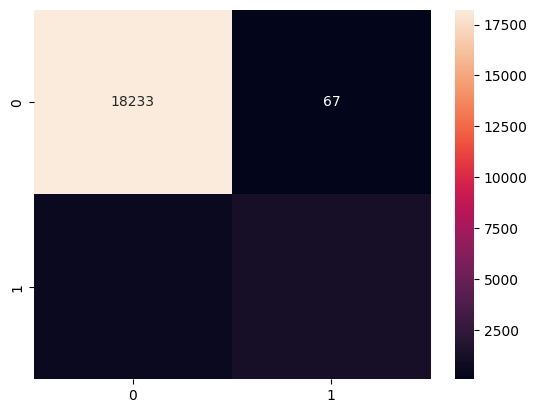

In [72]:
rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)
prediction = model.predict(X_test)

# Evaluation
print("Random Classifier Accuracy:", accuracy_score(y_test, prediction))
print("ROC AUC Score:", roc_auc_score(prediction, model.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, prediction))

#plotting the confusion matrix heatmap
print(confusion_matrix(y_test, prediction))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d')

Random Classifier Accuracy: 0.95175
ROC AUC Score: 1.0
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.71      0.74      0.72      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000

[[17783   517]
 [  448  1252]]


<Axes: >

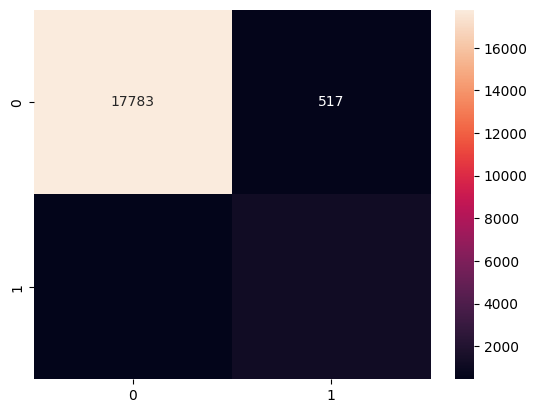

In [75]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)
dt_prediction = dt_model.predict(X_test)

# Evaluation
print("Decision True Accuracy:", accuracy_score(y_test, dt_prediction))
print("ROC AUC Score:", roc_auc_score(dt_prediction, dt_model.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, dt_prediction))

#plotting the confusion matrix heatmap
print(confusion_matrix(y_test, dt_prediction))
sns.heatmap(confusion_matrix(y_test, dt_prediction), annot=True, fmt='d')

In [76]:
df2

,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes,bmi_2
0,0,80.0,0,1,4,6.6,140,0,3.226447
1,0,54.0,0,0,0,6.6,80,0,3.307619
2,1,28.0,0,0,4,5.7,158,0,3.307619
3,0,36.0,0,0,1,5.0,155,0,3.154870
4,1,76.0,1,1,1,4.8,155,0,3.002708
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,6.2,90,0,3.307619
99996,0,2.0,0,0,0,6.5,100,0,2.854745
99997,1,66.0,0,0,3,5.7,155,0,3.326115
99998,0,24.0,0,0,4,4.0,100,0,3.567277


In [77]:
df2.corr()

,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes,bmi_2
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,0.019957,0.017199,0.037411,-0.016130
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.101354,0.110672,0.258008,0.397646
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.080939,0.084429,0.197823,0.148253
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.067589,0.070066,0.171727,0.068284
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.037369,0.040219,0.094290,0.197019
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,1.000000,0.166733,0.400660,0.079298
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.166733,1.000000,0.419558,0.087604
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.400660,0.419558,1.000000,0.204900
bmi_2,-0.016130,0.397646,0.148253,0.068284,0.197019,0.079298,0.087604,0.204900,1.000000


In [79]:
df2.describe()

,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes,bmi_2
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,5.527507,138.058060,0.085000,3.279229
std,0.493031,22.516840,0.26315,0.194593,1.889659,1.070672,40.708136,0.278883,0.239148
min,0.000000,0.080000,0.00000,0.000000,0.000000,3.500000,80.000000,0.000000,2.303585
25%,0.000000,24.000000,0.00000,0.000000,0.000000,4.800000,100.000000,0.000000,3.162517
50%,0.000000,43.000000,0.00000,0.000000,3.000000,5.800000,140.000000,0.000000,3.307619
75%,1.000000,60.000000,0.00000,0.000000,4.000000,6.200000,159.000000,0.000000,3.387098
max,2.000000,80.000000,1.00000,1.000000,5.000000,9.000000,300.000000,1.000000,4.561114


In [80]:
def age_group(x):
    if 0 <= x < 25:
        return 1 # young
    elif 25 <= x < 44:
        return 2 # middle age
    elif 44 <= x < 60:
        return 3 # advance age
    else:
        return 4 # old

In [81]:
df3 = df2.copy()
# Feature Engineering 
#age vs blood_glucose
df3['age_blood_g'] = df3['age'] / df3['blood_glucose_level']
#age vs smoking_his
df3['age_smoking_his'] = df3['age'] * df3['smoking_history']
#age vs bmi_2
df3['age_bmi_2'] = df3['age'] / df3['bmi_2']


In [82]:
df3['age'] = df3['age'].apply(age_group)

In [83]:
df3

,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes,bmi_2,age_blood_g,age_smoking_his,age_bmi_2
0,0,4,0,1,4,6.6,140,0,3.226447,0.571429,320.0,24.795076
1,0,3,0,0,0,6.6,80,0,3.307619,0.675000,0.0,16.325943
2,1,2,0,0,4,5.7,158,0,3.307619,0.177215,112.0,8.465304
3,0,2,0,0,1,5.0,155,0,3.154870,0.232258,36.0,11.410928
4,1,4,1,1,1,4.8,155,0,3.002708,0.490323,76.0,25.310487
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,4,0,0,0,6.2,90,0,3.307619,0.888889,0.0,24.186582
99996,0,1,0,0,0,6.5,100,0,2.854745,0.020000,0.0,0.700588
99997,1,4,0,0,3,5.7,155,0,3.326115,0.425806,198.0,19.842972
99998,0,1,0,0,4,4.0,100,0,3.567277,0.240000,96.0,6.727821


In [84]:
# separating the X and Y variables

X = df3.drop('diabetes', axis=1)
y = df3['diabetes']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Random Classifier Accuracy: 0.9696
ROC AUC Score: 0.9999999999999999
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.93      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

[[18217    83]
 [  525  1175]]


<Axes: >

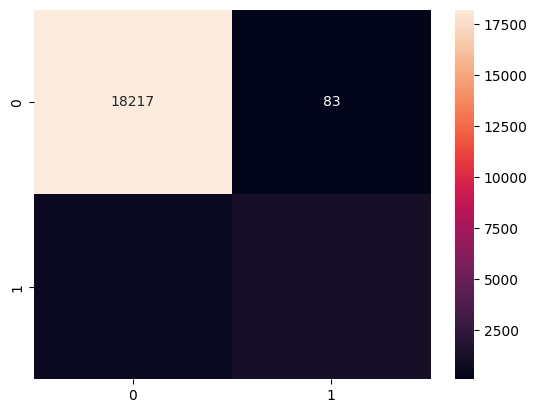

In [86]:
rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)
prediction = model.predict(X_test)

# Evaluation
print("Random Classifier Accuracy:", accuracy_score(y_test, prediction))
print("ROC AUC Score:", roc_auc_score(prediction, model.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, prediction))

#plotting the confusion matrix heatmap
print(confusion_matrix(y_test, prediction))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d')

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30'),
  Text(0.35000000000000003, 0, '0.35'),
  Text(0.4, 0, '0.40'),
  Text(0.45, 0, '0.45')])

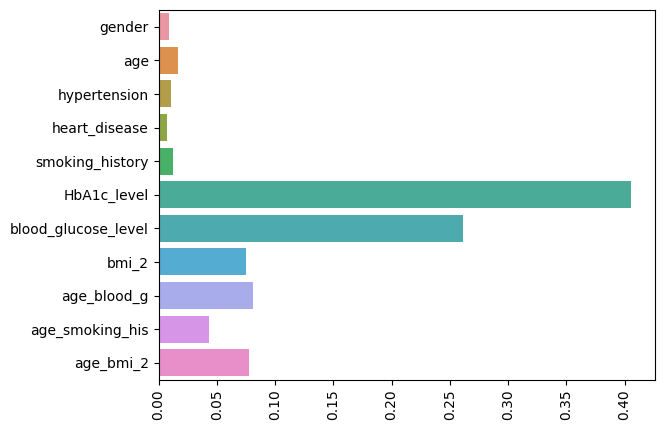

In [88]:
sns.barplot(y=X.columns, x=rf.feature_importances_, orient='h')
plt.xticks(rotation=90)

Decision Accuracy: 0.95395
ROC AUC Score: 1.0
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.73      0.74      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000

[[17825   475]
 [  446  1254]]


<Axes: >

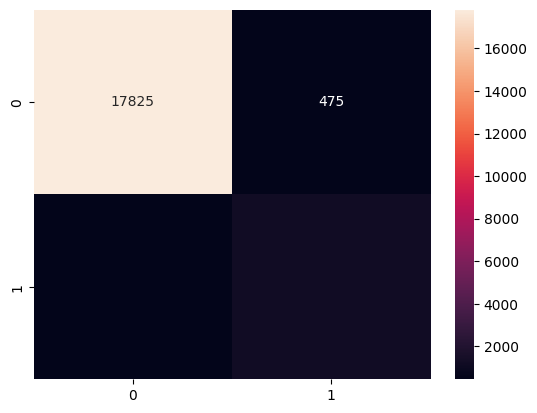

In [87]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)
dt_prediction = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_prediction))
print("ROC AUC Score:", roc_auc_score(dt_prediction, dt_model.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, dt_prediction))

#plotting the confusion matrix heatmap
print(confusion_matrix(y_test, dt_prediction))
sns.heatmap(confusion_matrix(y_test, dt_prediction), annot=True, fmt='d')

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6')])

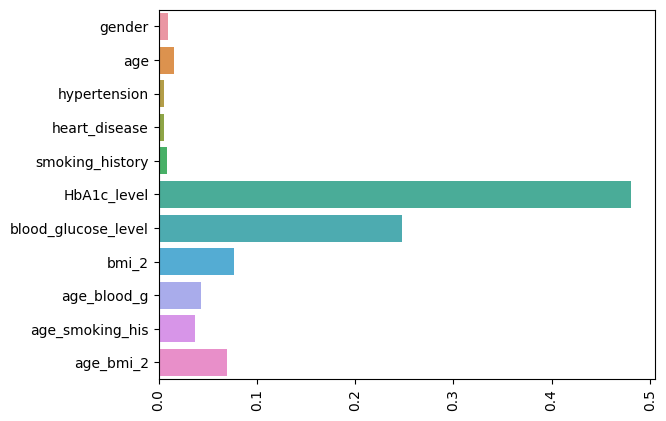

In [89]:
sns.barplot(y=X.columns, x=dt.feature_importances_, orient='h')
plt.xticks(rotation=90)